In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# read data of SCL's flights
df = pd.read_csv('./../datasets/SCL_flights_data.csv')
print(f"Shape: {df.shape}")
print(f"Info: {df.info()}")

Shape: (68206, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB
Info: None


### Check for missing values 

The missingno Python package is a data visualization tool that provides a convenient way to visualize missing values and patterns in datasets.  

When you use the `matrix(df)` function, it creates a visualization of the missing data in the DataFrame as a matrix or grid. Each row in the grid represents a variable in the DataFrame, and each column represents an observation or data point. The color of each cell in the grid indicates the proportion of missing data for that variable and observation.

**We can observe in the next matrix that all columns has data present into them**

<Axes: >

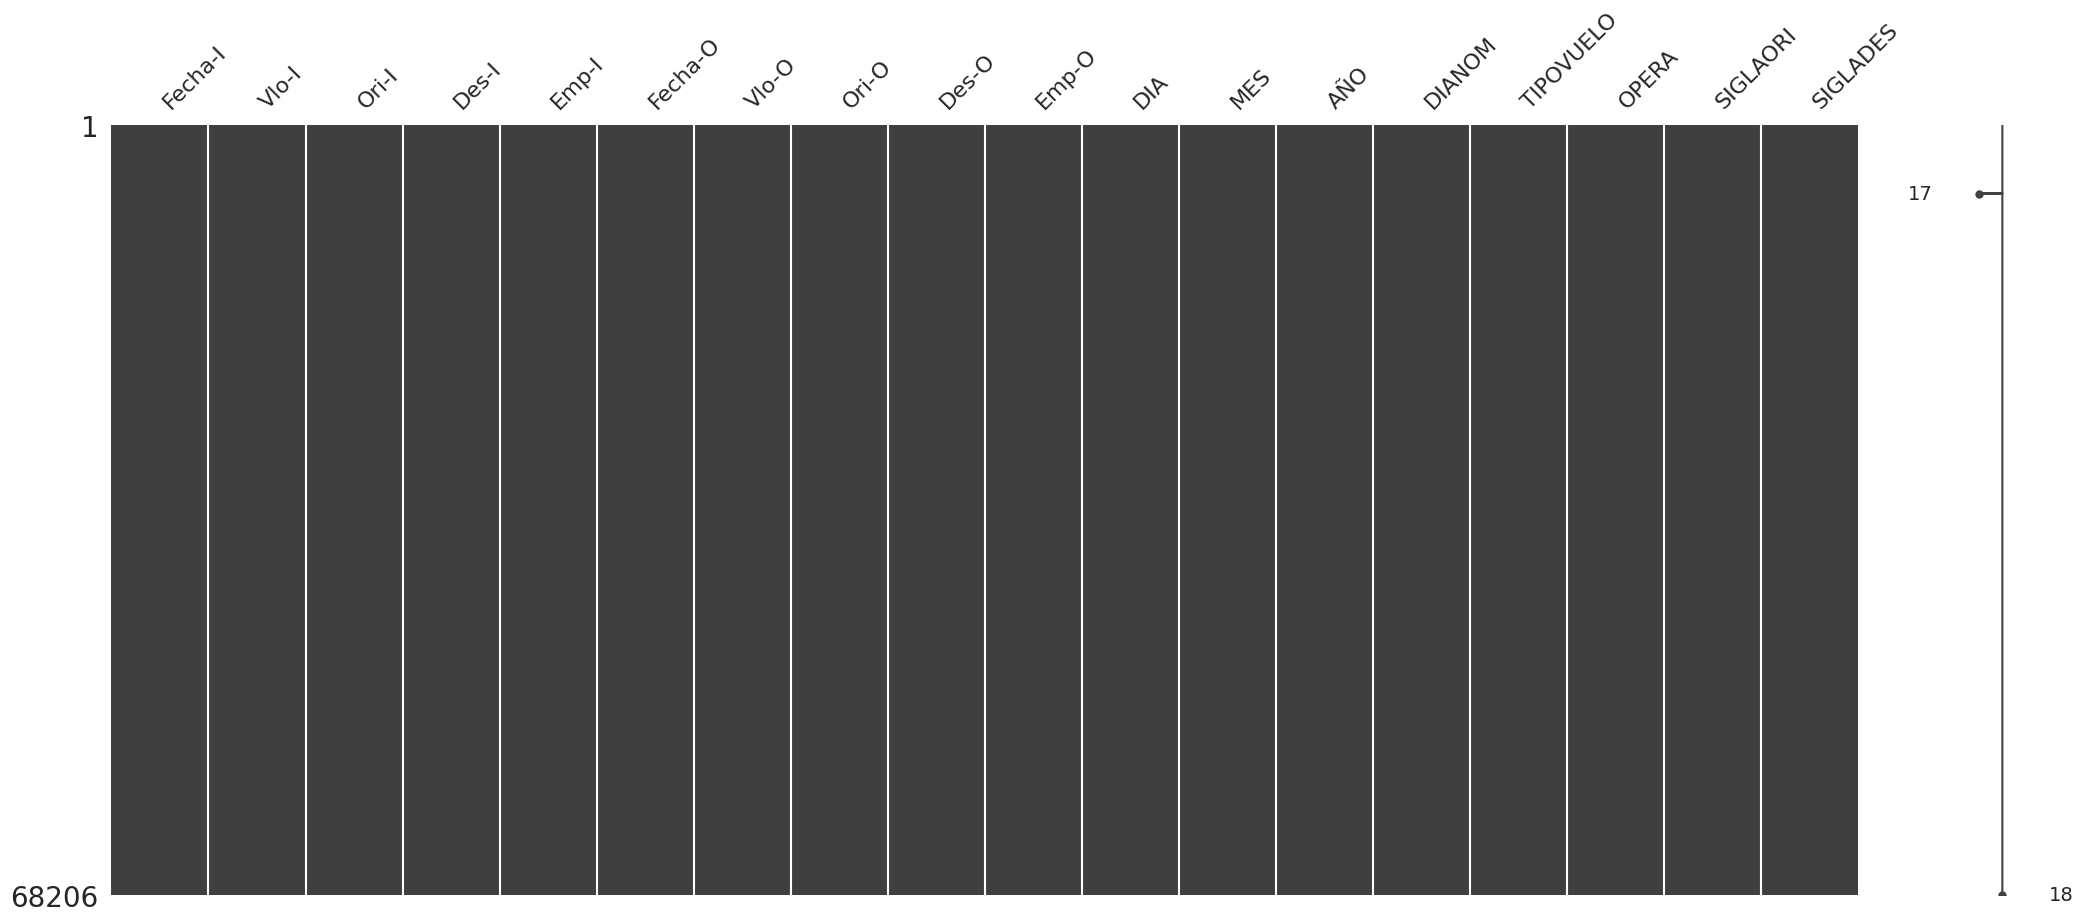

In [103]:
msng.matrix(df)

### Check descriptive statistics

This is useful to detect any potential issue or outliers in the data and in getting a general sense of the data's properties. 

**We can see that there are no apparent issues or outliers in the data**
- The minimum value and maximum value of both DIA and MES make sense. 
- The mean values of DIA is 15, which is close to the middle of the range of possible values.(1-31)
- The mean values of MEAN is 6, which is also close to the middle of the range of possible values. (1-12)
- The data is from 2017 to 2018, so the mean of 2017 is expected. 
- The quartile values are evenly distributed, so there is no significant clustering of values at either end of the range or around any specific value.

In [104]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


# Visualize distributions

### Check frequency of flights for each airline


**The data distribution is not symmetrical, it is heavily skewed** So, we can assume that Grupo LATAM and Sky Airline are more likely to experience delays due to the higher number of flights they operate.


The below info is not particularly informative since it does not direcly measures the frequency or duration of delays. 

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64


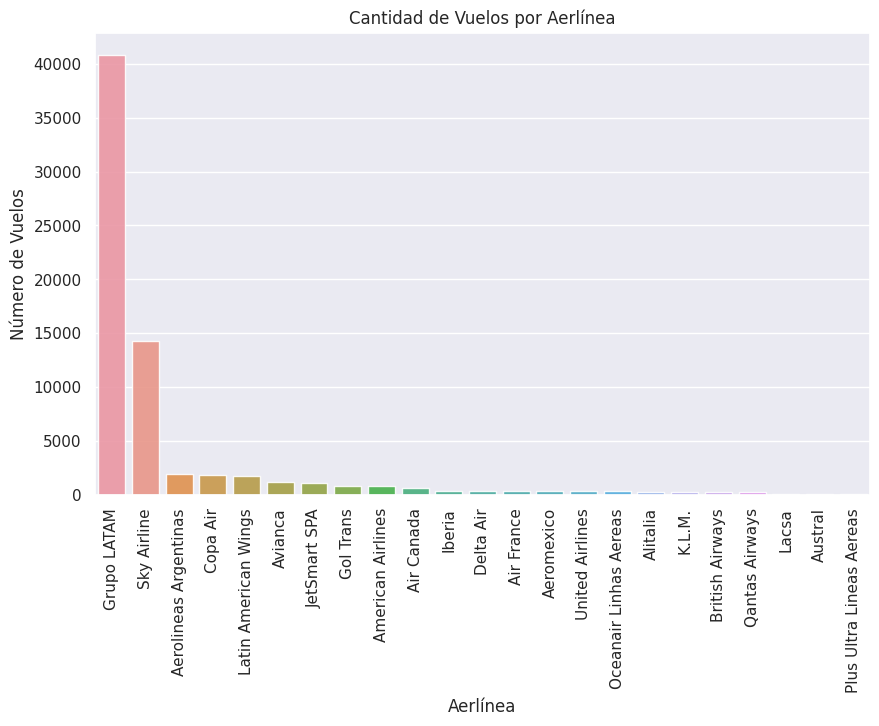

In [105]:
df1 = df['OPERA'].value_counts()
print(df1)

vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Check frequencies of flights per day 

**The data distribution is symmetrical** with some minor variations in the frequencies. 

20    2290
27    2286
12    2284
10    2283
6     2275
22    2272
13    2272
3     2271
16    2268
26    2267
21    2267
7     2264
23    2260
5     2241
15    2239
19    2238
11    2237
24    2232
28    2232
17    2228
9     2227
2     2223
14    2221
4     2215
8     2213
1     2208
25    2179
18    2160
29    2044
30    2020
31    1290
Name: DIA, dtype: int64


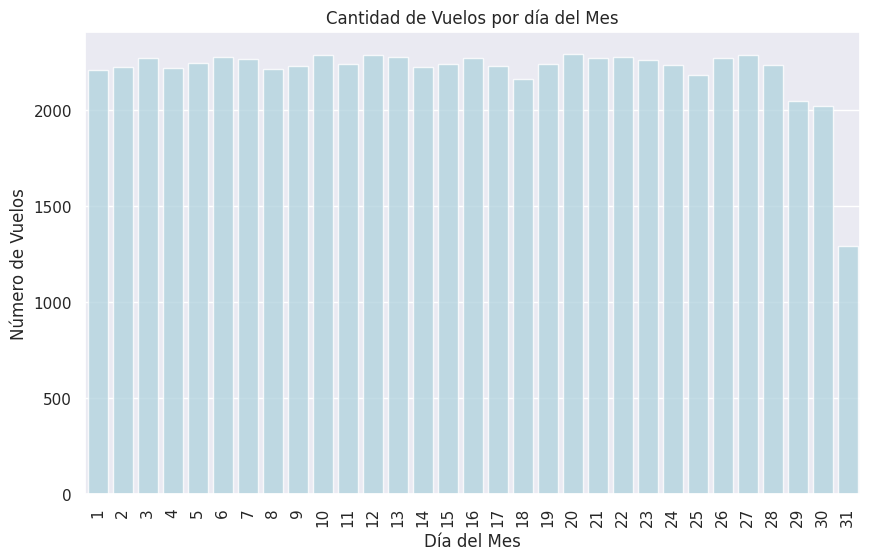

In [106]:
df1 = df['DIA'].value_counts()
print(df1)


vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_dia.index, y=vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64


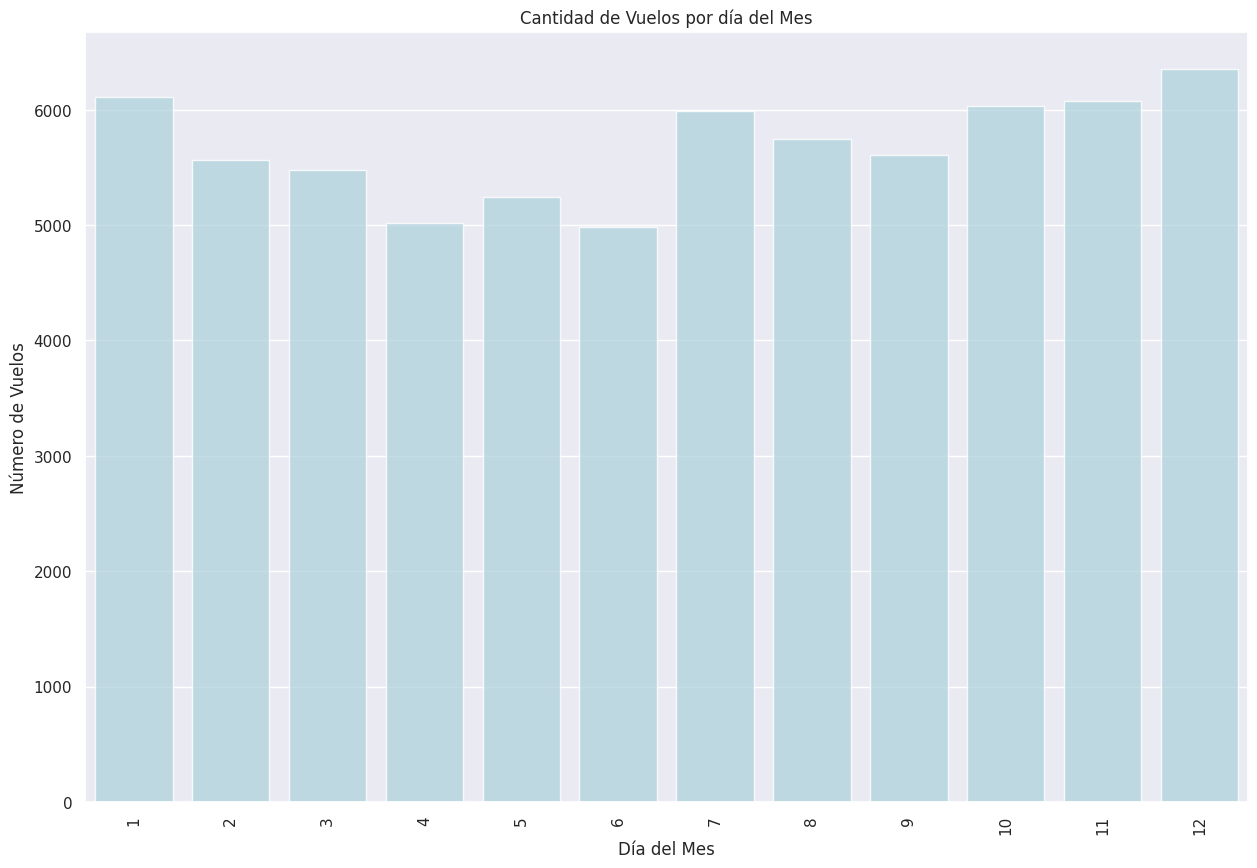

In [107]:
df1 = df['MES'].value_counts()
print(df1)

vuelos_mes = df['MES'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_mes.index, y=vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64


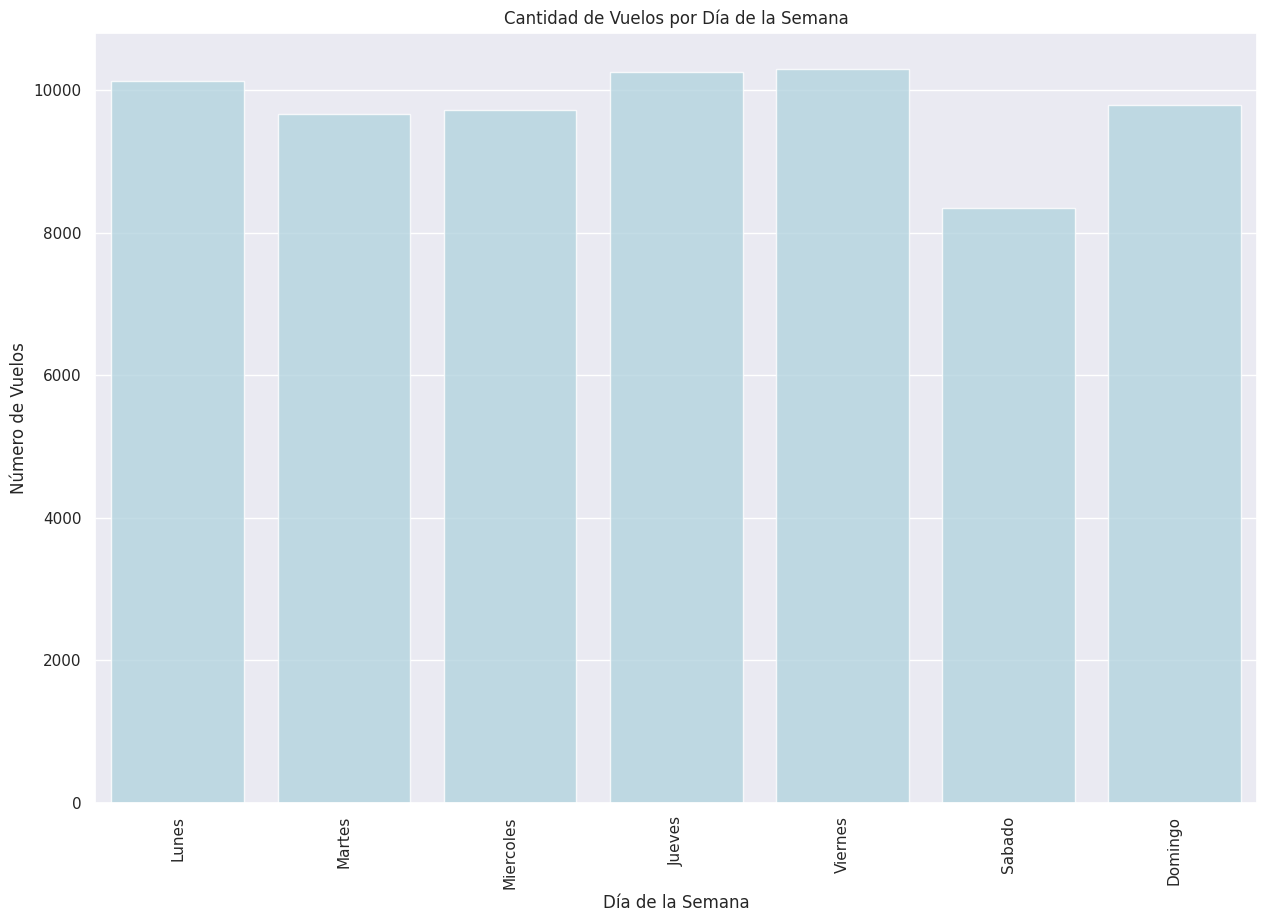

In [108]:
df1 = df['DIANOM'].value_counts()
print(df1)

vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(x=dias, y=valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64


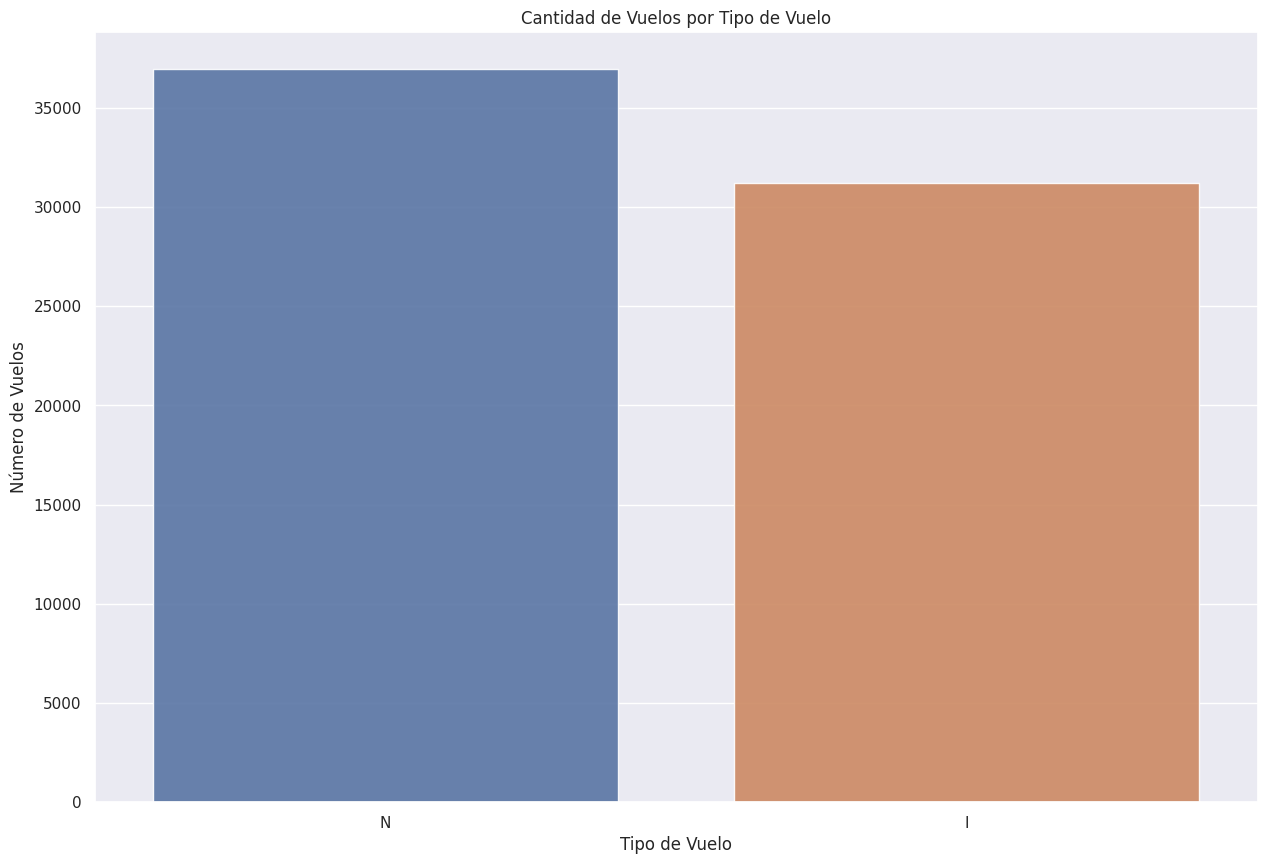

In [109]:
df1 = df['TIPOVUELO'].value_counts()
print(df1)

vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

Buenos Aires      6335
Antofagasta       5786
Lima              5270
Calama            5146
Puerto Montt      4357
                  ... 
Quito                2
Washington           1
Pisco, Peru          1
Puerto Stanley       1
Cochabamba           1
Name: SIGLADES, Length: 62, dtype: int64


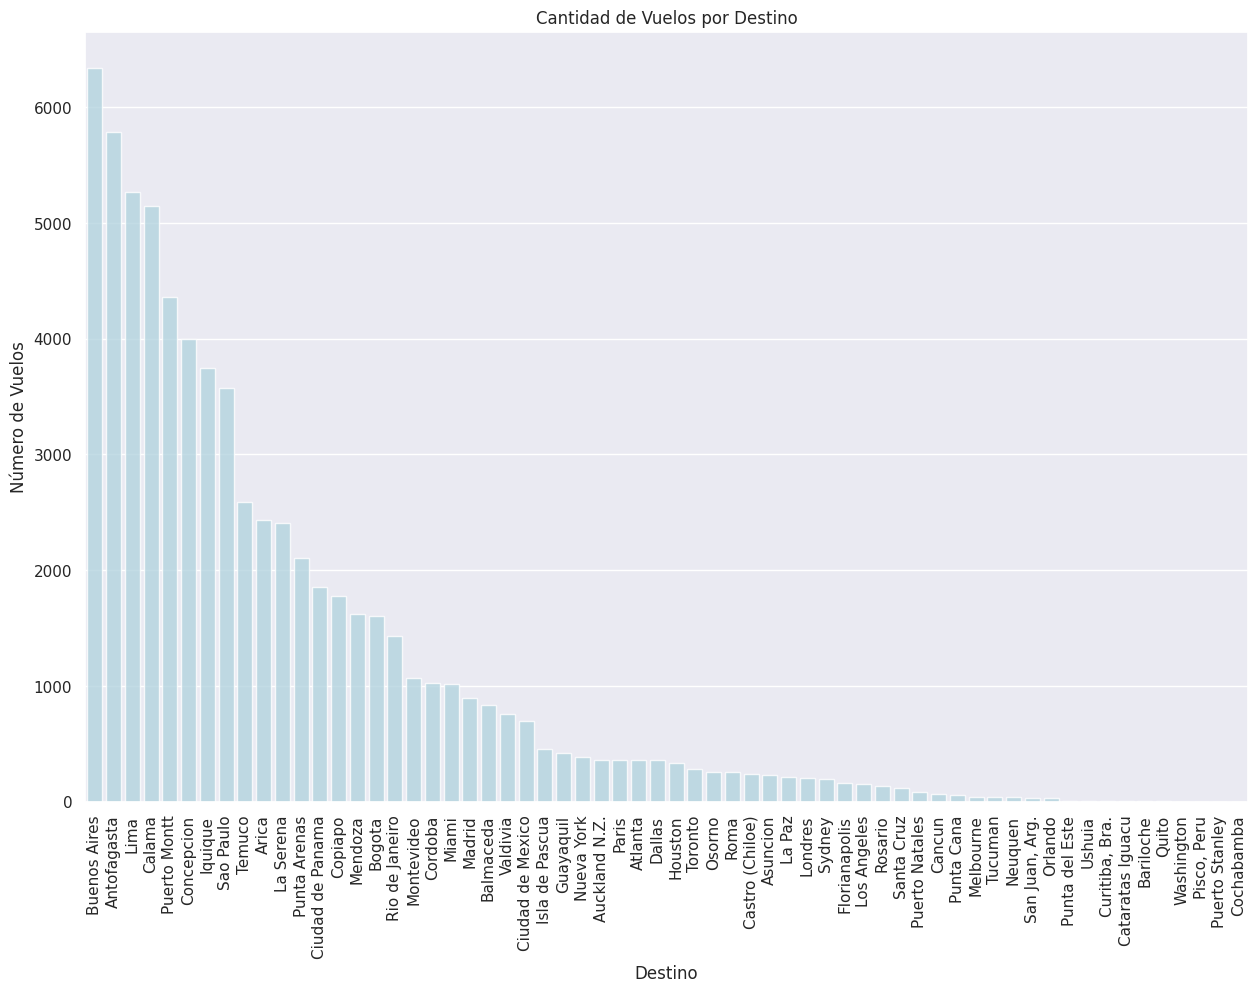

In [110]:
df1 = df['SIGLADES'].value_counts()
print(df1)

vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x= vuelos.index, y=vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

# Generate new data 

In [111]:
def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0

    
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)
df1 = df['temporada_alta'].value_counts()
print(df1)

0    46174
1    22032
Name: temporada_alta, dtype: int64


In [112]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min

df['dif_min'] = df.apply(dif_min, axis = 1)
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [113]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'
    
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)
df['periodo_dia'].value_counts()

tarde     25050
mañana    24867
noche     17059
Name: periodo_dia, dtype: int64

In [114]:
#df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('./../data/SCL_flights_data_extra.csv', index = False)

In [115]:
#df.to_csv('./../data/SCL_flights_full.csv', index = False)

# Create model

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import xgboost as xgb
from xgboost import plot_importance

In [141]:
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)


print(f"Training data shape: {x_train.shape} - Evaluation data shape: {x_test.shape}")
print(f"Training dist: {y_train.value_counts('%')}")
print(f"Evaluation dist: {y_test.value_counts('%')}")

Training data shape: (45698, 37) - Evaluation data shape: (22508, 37)
Training dist: 0    0.813799
1    0.186201
Name: atraso_15, dtype: float64
Evaluation dist: 0    0.81762
1    0.18238
Name: atraso_15, dtype: float64


### Logistic regression model 

In [142]:
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)
y_pred = model.predict(x_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



### XGBoots model 

In [143]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)
y_predxgb = modelxgb.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



The above models performs well in terms of precision for class "0" (82%), but poorly in terms of recall for class "1" (3%). This means that the model is good at identifying instances that belong to class "0", but not very good at identifying instances that belong to class "1". 

### Inference 

In [97]:
print(f"Params needed for inference {x_train.columns}")

new_data = [[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]]

predictions = model.predict(new_data)
print(f"Dummy prediction: {predictions}")

Params needed for inference Index(['OPERA_Aerolineas Argentinas', 'OPERA_Aeromexico', 'OPERA_Air Canada',
       'OPERA_Air France', 'OPERA_Alitalia', 'OPERA_American Airlines',
       'OPERA_Austral', 'OPERA_Avianca', 'OPERA_British Airways',
       'OPERA_Copa Air', 'OPERA_Delta Air', 'OPERA_Gol Trans',
       'OPERA_Grupo LATAM', 'OPERA_Iberia', 'OPERA_JetSmart SPA',
       'OPERA_K.L.M.', 'OPERA_Lacsa', 'OPERA_Latin American Wings',
       'OPERA_Oceanair Linhas Aereas', 'OPERA_Plus Ultra Lineas Aereas',
       'OPERA_Qantas Airways', 'OPERA_Sky Airline', 'OPERA_United Airlines',
       'TIPOVUELO_I', 'TIPOVUELO_N', 'MES_1', 'MES_2', 'MES_3', 'MES_4',
       'MES_5', 'MES_6', 'MES_7', 'MES_8', 'MES_9', 'MES_10', 'MES_11',
       'MES_12'],
      dtype='object')
Dummy prediction: [0]
